In [2]:
from tensorflow.keras.preprocessing import text
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
data = pd.read_csv("../data/data_transformed.csv")
data.head(n=20)

,index,job_title,skill_name,job_title_trans,job_title_color
0,0,Data Engineer,"5S,Amazon Web Services (AWS),CGI,Extract-Trans...",engineer,2
1,1,Data Scientist,"5S,Amazon Web Services (AWS),Extract-Transform...",scientist,0
2,2,Senior Data Engineer - Panorama Financial Inst...,"API,Amazon Web Services (AWS),Extract-Transfor...",engineer,2
3,3,Senior Production Support (DevOps) – Data Anal...,"5S,Artificial Intelligence,Amazon Web Services...",ops,3
4,4,MTB Process Data Analyst Engineer,"3D Modeling,5G,Artificial Intelligence,Dynamic...",analyst,1
5,5,Lead Data Scientist,"Artificial Intelligence,Human Computer Interac...",scientist,0
6,6,Senior Data Scientist,"Artificial Intelligence,API,Computer Aided Tra...",scientist,0
7,7,"Financial Crimes Compliance, Data Scientist/Da...","Activity-Based Costing (ABC),Artificial Intell...",engineer,2
8,8,Senior Principal Software Engineer - (IT Data ...,"Software Development Life Cycle (SDL),SQL,MS T...",analyst,1
9,9,Analytics Solution Architect & Data Engineer,"API,Internet of Things (IoT),Machine Learning,...",architect,3


<Axes: >

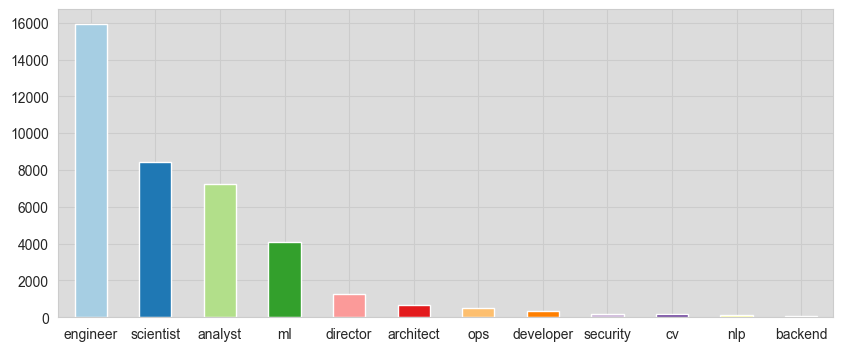

In [31]:
value_counts = data["job_title_trans"].value_counts()

#background
plt.gca().set_facecolor('gainsboro')

value_counts.plot(kind="bar", rot=0, figsize=(10,4), xlabel="", color=plt.get_cmap("Paired").colors[:11])

# Tokenization

In [27]:
tokenizer = text.Tokenizer(num_words=1000, split=",", filters="")
tokenizer.fit_on_texts(data['skill_name'].values)
bag_of_words = tokenizer.texts_to_matrix(data['skill_name'].values)

In [28]:
bag_of_words.shape

(38999, 1000)

# 2D - tSNE

In [21]:
#tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=5000, random_state=23)
#new_values = tsne_model.fit_transform(bag_of_words)
#np.save('../model/bow_tsne_2D.npy', new_values)

[Text(0.5, 1.0, 'T-SNE projection')]

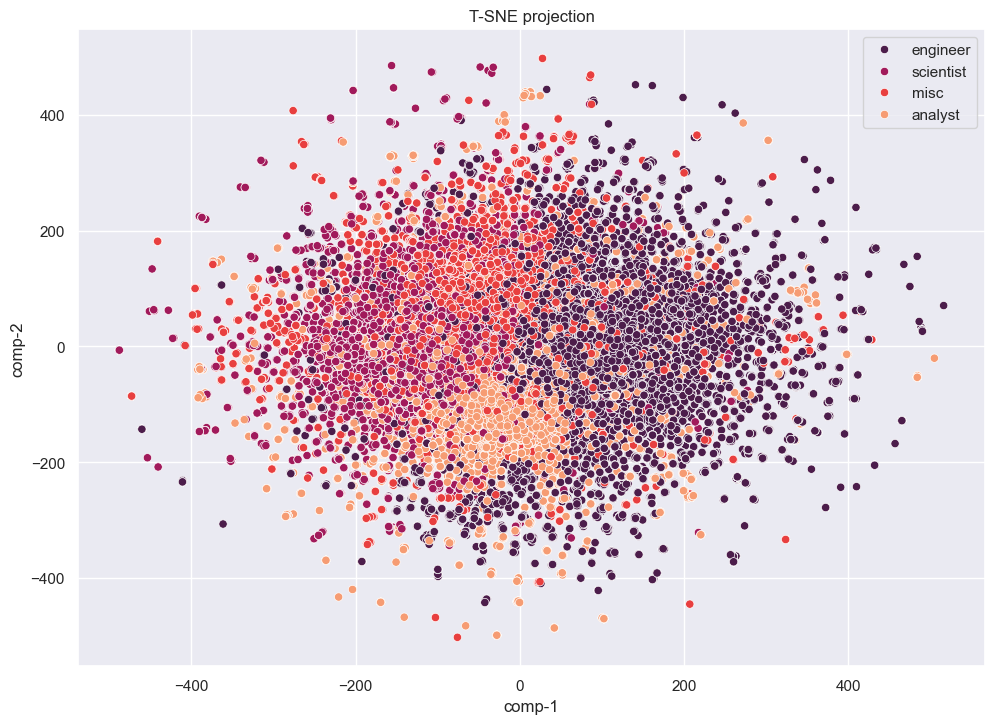

In [32]:
new_values = np.load('../model/bow_tsne_2D.npy')
df = pd.DataFrame()
df["y"] = data["job_title_color"].apply(lambda x: ["scientist", "analyst", "engineer", "misc"][x])
df["comp-1"] = new_values[:,0]
df["comp-2"] = new_values[:,1]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette="rocket",
                data=df).set(title="T-SNE projection")

# 3D - tSNE

In [22]:
#tsne_model = TSNE(perplexity=10, n_components=3, init='pca', n_iter=5000, random_state=23)
#new_values = tsne_model.fit_transform(bag_of_words)
#np.save('../model/bow_tsne_3D.npy', new_values)

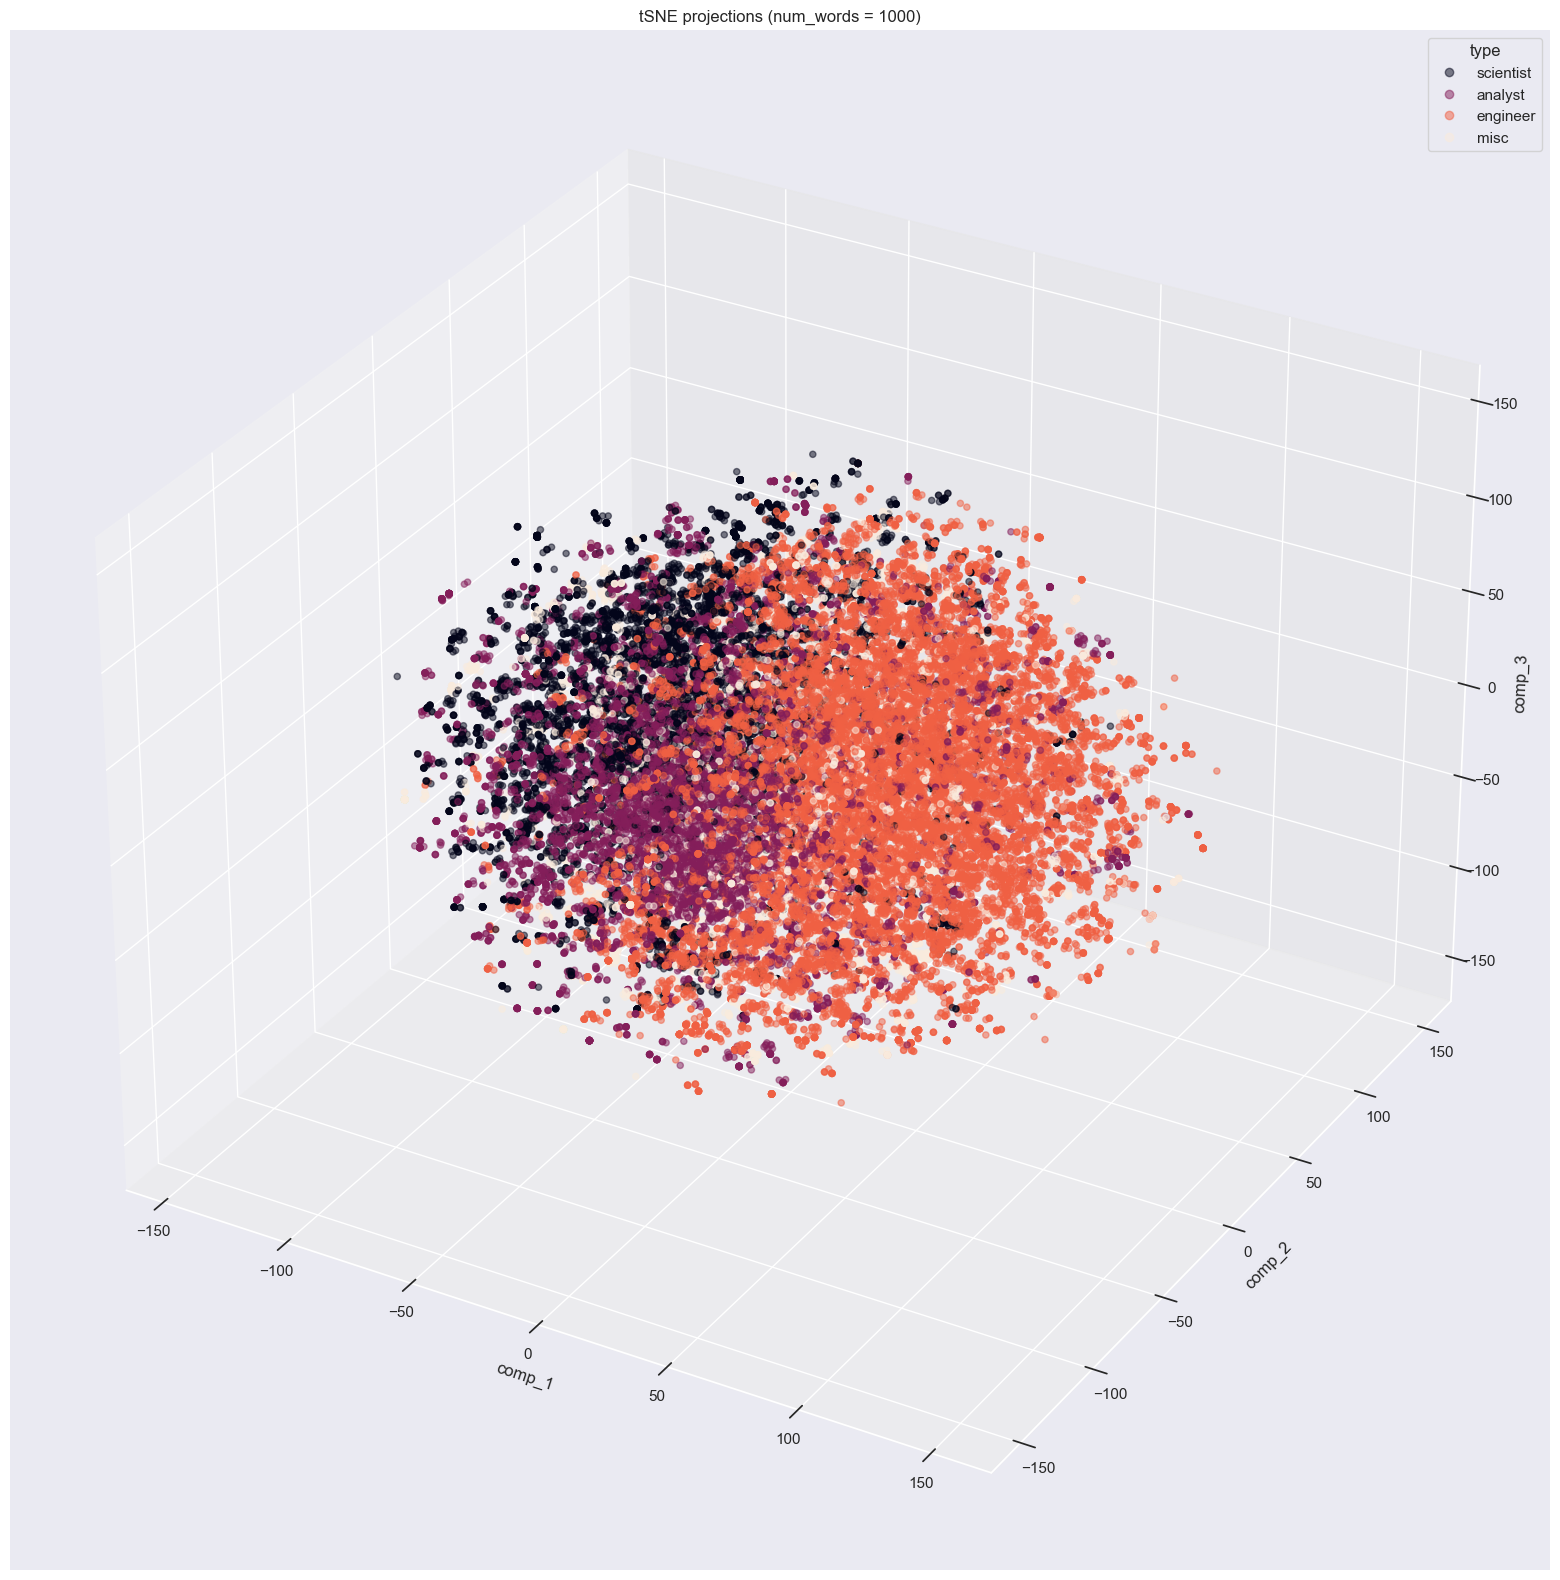

In [33]:
new_values = np.load('../model/bow_tsne_3D.npy')
labels = data["job_title_color"]
x = new_values[:,0]
y = new_values[:,1]
z = new_values[:,2]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("comp_1")
ax.set_ylabel("comp_2")
ax.set_zlabel("comp_3")

scatter = ax.scatter(x, y, z, c=labels, alpha=0.5)
ax.set_title("tSNE projections (num_words = 1000)")

ax.legend(scatter.legend_elements()[0], ["scientist", "analyst", "engineer", "misc"], title="type")

plt.show()